# AOS111 week 0 
## Goals
- [ ] To familiarize ourselves with the Google Colab environment
- [ ] Python, Notebooks
- [ ] Common numpy commands
- [ ] Common matplotlib commands

Created by Donglai Ma, August 2020


## Numpy 
[Numpy](https://numpy.org/) is the core library used for scientific computing in Python. It provides a high-performance, multidimensional array object, and tools for working with these arrays. It is used extensively in Machine Learning and will be the main library used in our class.

### Introduction to Arrays
A numpy array is a grid of values, all of the same type, and is indexed by a tuple (i.e., sequence) of nonnegative integers. The number of dimensions is the $rank$ of the array; the $shape$ of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets.  Here are a few examples of common usage:

In [30]:
import numpy as np

a = np.array([1, 2, 3])  # Create a 1-dimension array (1, 2, 3)
print(type(a))  # Prints "<class 'numpy.ndarray'>"
print(a.shape)  # Prints "(3,)"
print(a[0], a[1], a[2])  # Prints "1 2 3" (please note indexing always starts at 0, not 1)
a[0] = 5  # Change an element of the array
print(a)  # Prints "[5, 2, 3]"

b = np.array([[1, 2, 3], [4, 5, 6]])  # Create a 2-dimension array
print(b.shape)  # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])  # Prints "1 2 4"

# # Get a row of this 2d array
# print(b[0])                        # Prints "[1 2 3]"
# print(type(b[0]))                  # Prints "<class 'numpy.ndarray'>"
# print(b[0].shape)                  # Prints "(3,)"

# # How would you get a column of the array b?

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


There are also many different ways to [create arrays](https://numpy.org/doc/stable/user/basics.creation.html#arrays-creation):





In [16]:
import numpy as np

a = np.arange(0, 7, 1)  # Create an array from 0 to 7
                        # [0,7) with step = 1
print(a)  # Prints "[0 1 2 3 4 5 6]"

b = np.ones((2, 3))  # Create an array of all ones
print(b)             # Prints "[[1. 1. 1.]
                     #         [1. 1. 1.]]"

c = np.random.random((3, 4))  # Create and random array with shape(3,4)
print(c)

[0 1 2 3 4 5 6]
[[1. 1. 1.]
 [1. 1. 1.]]
[[0.10381612 0.81154859 0.51360876 0.37029587]
 [0.94900309 0.67334704 0.08363567 0.64194969]
 [0.34210994 0.13167322 0.59641799 0.06341133]]



### Indexing
Indexing into arrays gives us methods to manipulate values.

Similar to Python lists and Matlab, numpy arrays can be sliced.


In [17]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])  # Prints "2"
b[0, 0] = 77  # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])  # Prints "77"

#########################################
# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]  # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

2
77
[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)


#### Boolean array indexing
Boolean array indexing is used to select the elements of an array that satisfy some condition:

In [18]:
import numpy as np

a = np.array([[1, 2, 3, 4], [10, 20, 30, 40], [100, 200, 300, 400]])
print(a)

# Find the elements that are bigger than 11
bool_idx = (a > 11)
print(bool_idx)  # Prints "[[False False False False]
                 #          [False  True  True  True]
                 #          [ True  True  True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[ 20  30  40 100 200 300 400]"

[[  1   2   3   4]
 [ 10  20  30  40]
 [100 200 300 400]]
[[False False False False]
 [False  True  True  True]
 [ True  True  True  True]]
[ 20  30  40 100 200 300 400]


### Array math

In [19]:
import numpy as np

x = np.array([[1, 2], [3, 4]], dtype=np.float64)
y = np.array([[5, 6], [7, 8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


#### Matrix product and transpose

In [20]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [21]:
import numpy as np

x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"



[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


### Broadcasting
Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

In [22]:
import numpy as np

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
b = a + 1
print(b)          # Prints "[[ 2  3  4  5]
                  #          [ 6  7  8  9]
                  #          [10 11 12 13]]"

c = np.ones(4)    # Creates [1,1,1,1]
d = a + c
print(d)

e = np.array([[1],[1],[1]])
f = a + e
print(f)

[[ 2  3  4  5]
 [ 6  7  8  9]
 [10 11 12 13]]
[[ 2.  3.  4.  5.]
 [ 6.  7.  8.  9.]
 [10. 11. 12. 13.]]
[[ 2  3  4  5]
 [ 6  7  8  9]
 [10 11 12 13]]


Broadcasting two arrays together follows these rules:


1.   If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2.   The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3.   The arrays can be broadcast together if they are compatible in all dimensions.
4.   After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5.   In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

## In-class Coding

1. Create a matrix and calculate it's determinant use the methods above
$$\begin{pmatrix} 50 & 60 & 70 \\ 60 & 70 & 80 \\ 70 & 80 & 90  \end{pmatrix}$$
Make sure it's robust when you want to use your function to calculate other 3*3 matrix

2. Could you google a function provided by numpy to calculate the det of matrix?

In [23]:
# Your code start here


def det_33(a):
    """
    @a: input 3x3 array
    @return: value of det(a)
    
    """
  
    a_det = 99999.9999
    return a_det

# Check your det value here
a = np.array([[50,60,70],[60,70,80],[70,80,90]])
print(det_33(a))


print(np.linalg.det(a))

99999.9999
0.0


If you run this on your own computer but not google colab, there is difference between these two results! Here is a more interesting effect:



In [24]:
a = 4.2
b = 2.1
a+b,(a+b)==6.3

(6.300000000000001, False)

Since Python’s float data type stores data using the native representation, there’s nothing you can do to avoid such errors.Generally speaking, if you want to present 0.4 in binary, it's 0.011001100110............

We don't need to worry this effect in this machine learning class, but do careful about this when you'd like to do some high performance scientific problem!

## Matplotlib

[Matplotlib](https://matplotlib.org/) is a plotting library. In this section give a brief introduction to the matplotlib.pyplot module, which provides a plotting system similar to that of MATLAB. You could find anything you need [here](https://matplotlib.org/tutorials/introductory/pyplot.html).

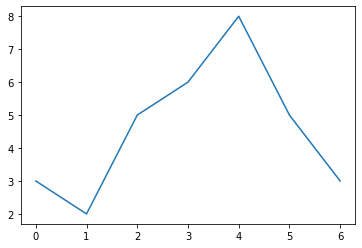

In [25]:
import matplotlib.pyplot as plt

a = np.array([3,2,5,6,8,5,3])
plt.plot(a)
plt.show()

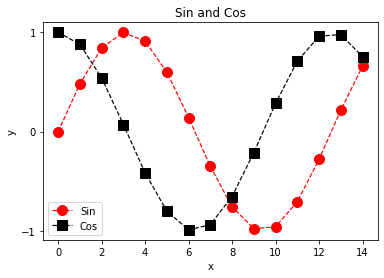

In [26]:
x = np.arange(15)
y1 = np.sin(0.5*x)
y2 = np.cos(0.5*x)
plt.plot(x,y1, 'o--', markersize=10, linewidth=1.2, color='r',label='Sin')
plt.plot(x,y2, 's--', markersize=10, linewidth=1.2, color='k', label='Cos')
plt.yticks([-1, 0, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sin and Cos')
plt.legend()
plt.show()

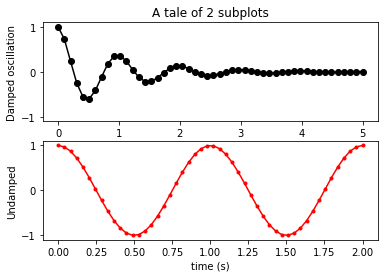

In [27]:
# Subplot
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharey=True)

ax1.plot(x1, y1, 'ko-')
ax1.set(title='A tale of 2 subplots', ylabel='Damped oscillation')

ax2.plot(x2, y2, 'r.-')
ax2.set(xlabel='time (s)', ylabel='Undamped')

plt.show()